In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets
%matplotlib inline

In [27]:
df = pd.read_csv("Netflix_Userbase.csv")

In [28]:
df.head(20)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
5,6,Premium,15,18-03-22,27-06-23,France,29,Female,Smart TV,1 Month
6,7,Standard,12,09-12-21,25-06-23,Brazil,46,Male,Tablet,1 Month
7,8,Basic,10,02-04-23,24-06-23,Mexico,39,Female,Laptop,1 Month
8,9,Standard,12,20-10-22,23-06-23,Spain,37,Male,Smartphone,1 Month
9,10,Premium,15,07-01-23,22-06-23,Italy,44,Female,Smart TV,1 Month


No data available for the selected Country and Gender combination.


<Figure size 1200x600 with 0 Axes>

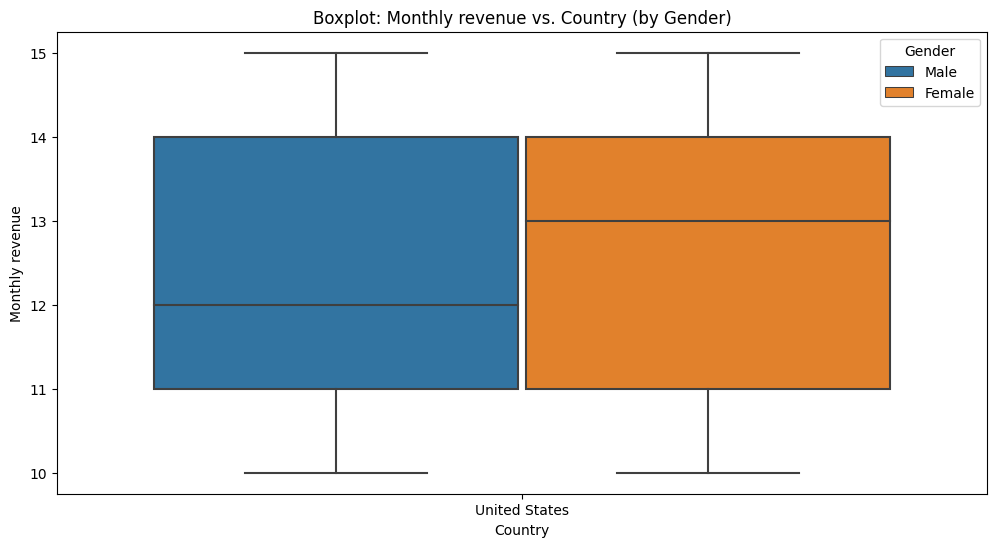

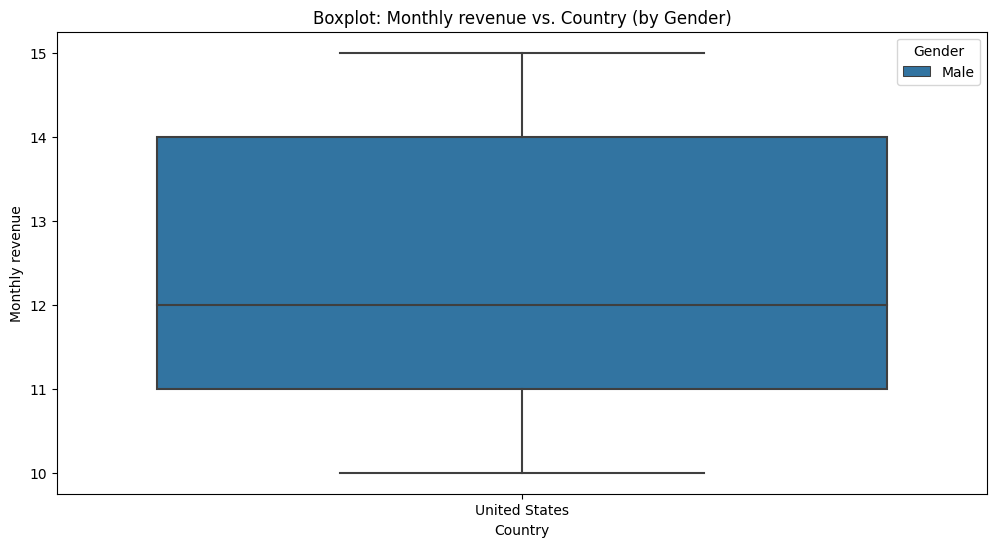

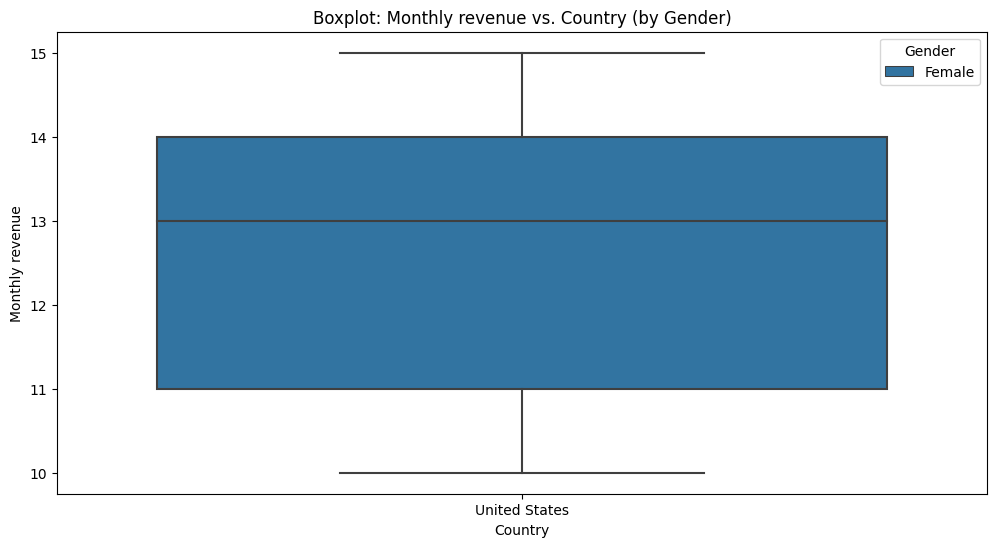

In [30]:
def interactive_boxplot(country, gender):
    plt.figure(figsize=(12, 6))
    filtered_data = df[(df['Country'] == country) & ((df['Gender'] == gender) | (gender == 'Gender'))]

    if not filtered_data.empty:
        sns.boxplot(x="Country", y="Monthly Revenue", hue="Gender", data=filtered_data)
        plt.title(f'Boxplot: {"Monthly Revenue".capitalize()} vs. {"Country".capitalize()} (by {"Gender".capitalize()})')
        plt.xlabel("Country".capitalize())
        plt.ylabel("Monthly Revenue".capitalize())
        plt.legend(title="Gender".capitalize(), loc='upper right')
    else:
        print("No data available for the selected Country and Gender combination.")

    plt.show()

# Create widgets for user input
country_dropdown = widgets.Dropdown(options=df['Country'].unique(), description='Country:')
gender_dropdown = widgets.Dropdown(options=['Gender', 'Male', 'Female'], description='Gender:', index=None)

# Define the interaction between widgets and plot function
def update_boxplot(*args):
    if len(df) > 0:
        interactive_boxplot(country_dropdown.value, gender_dropdown.value)
    else:
        print("The DataFrame 'df' is empty. Please check your data.")

# Link widgets to the update_boxplot function
country_dropdown.observe(update_boxplot, 'value')
gender_dropdown.observe(update_boxplot, 'value')

# Display the widgets and initial boxplot
display(widgets.VBox([country_dropdown, gender_dropdown]))

# Check if the DataFrame is empty before calling the interactive boxplot
if len(df) > 0:
    interactive_boxplot(df['Country'].unique()[0], None)
else:
    print("The DataFrame 'df' is empty. Please check your data.")